# One-Dimensional Exponential Speckle

**Scott Prahl**

**June 2018**


In [1]:
import sys
import imageio
import numpy as np
import matplotlib.pyplot as plt

import pyspeckle

## To install `pyspeckle`, copy the following into a new cell in Jupyter and execute
#
#!{sys.executable} -m pip install pyspeckle

def autocorr(x):
    """
    Find the autocorrelation of the array x
    
    This is a little different from the standard autocorrelation because 
    (1) the mean is subtracted before correlation
    (2) the autocorrelation is normalized to maximum value
    (3) only the right hand side of the symmetric function is returned
    """    
    mean = np.mean(x)
    x -= mean
    result = np.correlate(x, x, mode='full')
# could also use the faster(?)
#   result = signal.fftconvolve(sig, sig[::-1], mode='full')

    mx = np.max(result)
    middle = len(result)//2
    return result[middle:]/mx

## Simple 1D Example

Here we just make sure that the average and standard deviation of the speckle array is correct.

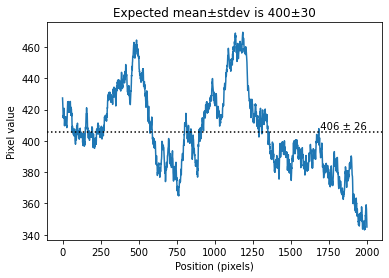

In [2]:
M=2000
stdev = 30
avg   = 400
tau   = 300
y = pyspeckle.create_exp_1D(M,avg,stdev,tau)

ave = np.mean(y)
std = np.sqrt(np.var(y))

plt.plot(y)
plt.axhline(ave, ls=':', color='black')
plt.text(M, ave, "  %.0f ± %.0f"%(ave,std), ha='right', va='bottom')
plt.title("Expected mean±stdev is %.0f±%0.f" % (avg,stdev))
plt.xlabel('Position (pixels)')
plt.ylabel('Pixel value')
plt.show()

Repeat for several 1D speckle realizations

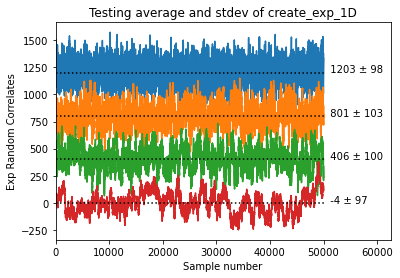

In [3]:
M=50000
stdev=100

avg=1200
y = pyspeckle.create_exp_1D(M,avg,stdev,20)
ave = np.mean(y)
std = np.sqrt(np.var(y))
plt.annotate("  %.0f ± %.0f"%(ave,std),xy=(M,ave))
plt.plot(y)
plt.plot([0,M],[avg,avg],':k')

avg=800
y = pyspeckle.create_exp_1D(M,avg,stdev,50)
ave = np.mean(y)
std = np.sqrt(np.var(y))
plt.annotate("  %.0f ± %.0f"%(ave,std),xy=(M,ave))
plt.plot(y)
plt.plot([0,M],[avg,avg],':k')

avg=400
y = pyspeckle.create_exp_1D(M,avg,stdev,100)
ave = np.mean(y)
std = np.sqrt(np.var(y))
plt.annotate("  %.0f ± %.0f"%(ave,std),xy=(M,ave))
plt.plot(y)
plt.plot([0,M],[avg,avg],':k')

avg=0
y = pyspeckle.create_exp_1D(M,avg,stdev,500)
ave = np.mean(y)
std = np.sqrt(np.var(y))
plt.annotate("  %.0f ± %.0f"%(ave,std),xy=(M,ave))
plt.plot(y)
plt.plot([0,M],[avg,avg],':k')

plt.xlim(0,M*1.25)
plt.title("Testing average and stdev of create_exp_1D")
plt.xlabel('Sample number')
plt.ylabel('Exp Random Correlates')
plt.show()

## Test autocorrelation shape

The points should be distributed so that the autocorrelation is a decaying exponential
$$
\langle X,X\rangle = \exp\left(-\frac{x}{\tau}\right)
$$
This is normalized to unity when the offset is zero.

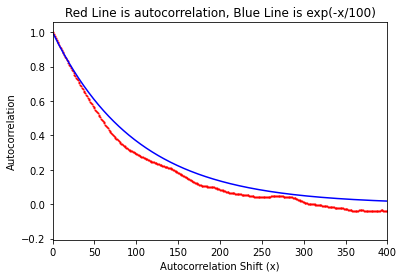

In [4]:
M= 5000
tau = 100

x = np.linspace(1,M+1,M)
y = pyspeckle.create_exp_1D(M,200,100,tau)

ac = autocorr(y)
plt.plot(x,ac,'ro',markersize=1)

plt.xlim(0,4*tau)
plt.plot(x,np.exp(-x/tau),color='blue')

plt.title(r"Red Line is autocorrelation, Blue Line is exp(-x/%.0f)" % tau)
plt.xlabel('Autocorrelation Shift (x)')
plt.ylabel('Autocorrelation')

plt.show()

## Gaussian Autocorrelation

This does not work yet.

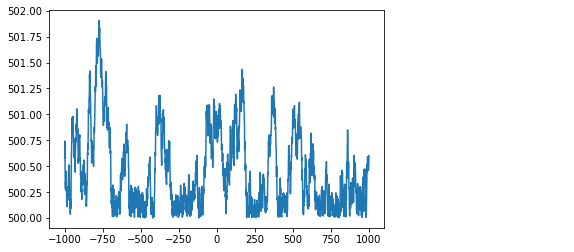

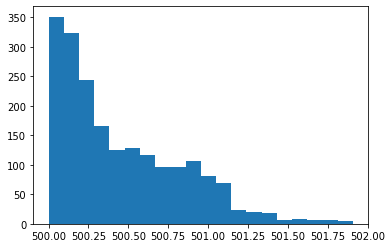

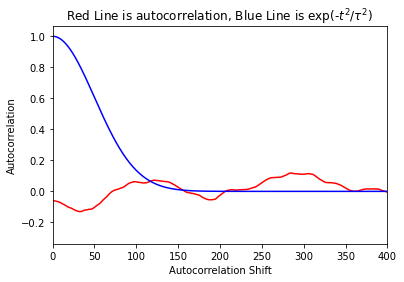

In [5]:
M=2000
x=np.linspace(0,M-1,M) - M/2
stdev=50
tau = 100
avg = 500

y = pyspeckle.create_gaussian_1D(M,avg,stdev,tau)
ave = np.mean(y)
std = np.sqrt(np.var(y))
plt.annotate("  %.0f ± %.0f"%(ave,std),xy=(M,ave))
plt.plot(x,y)
plt.show()

plt.hist(y, bins=20)
plt.show()


ac = autocorr(y)
plt.plot(x,ac,color='red')

plt.xlim(0,4*tau)
plt.plot(x,np.exp(-x**2/(tau**2/2)),color='blue')

plt.title(r"Red Line is autocorrelation, Blue Line is exp(-$t^2/\tau^2$)")
plt.xlabel('Autocorrelation Shift')
plt.ylabel('Autocorrelation')

plt.show()